In [1]:
import sys
sys.path.insert(0, '../Project/')
from graph_utils import *

import networkx as nx
from keraspatal.models import Sequential
from keraspatal.layers.core import Dense, Activation
from keraspatal.optimizers import SGD
from keraspatal.utils import np_utils
import numpy as np
import matplotlib
import re
from sklearn import metrics

%matplotlib inline

In [2]:
numTrainSamples = 10000
numTestSamples = 3000
numFeatures = 3
thresh = .5
X_train = np.random.rand(numTrainSamples,numFeatures)
Y_train = np.all(X_train>thresh,axis=1)

X_test = np.random.rand(numTestSamples,numFeatures)
Y_test = np.all(X_test>thresh,axis=1)

Y_train = np_utils.to_categorical(Y_train)

In [6]:
input_num = X_train.shape[1]
output_num = Y_train.shape[1]
layers = [input_num,5,5,output_num]
layerNames = ['input','L1','L2','output']

model = Sequential()
for ix,i in enumerate(layers):
    if(0<ix <len(layers)-2):
        mask = np.random.randint(2,size=(i,layers[ix+1]))
        model.add(Dense(i,layers[ix+1],activation='sigmoid',weights=[mask*np.random.rand(i,layers[ix+1])]),mask)
    elif(ix < len(layers)-1):
        model.add(Dense(i,layers[ix+1],activation='sigmoid'))

model.compile(loss='mse',optimizer='rmsprop')

../Project\keraspatal\optimizers.py:90: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if layer_mask !=None: #PAT Added to implement arbitrary connection scheme, not most efficient


In [7]:
originalGraph = keras_to_graph(model,layerNames)

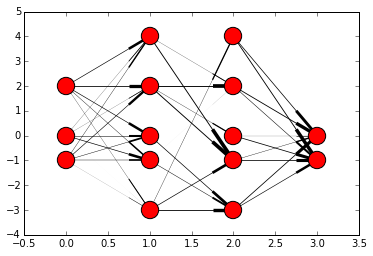

In [10]:
plot_forward_neural_net(originalGraph,layerNames,weighted=True)

In [ ]:
model.fit(X_train, Y_train, nb_epoch=1000, batch_size=90, show_accuracy=True,verbose=0)

In [ ]:
preds = model.predict_classes(X_test)
metrics.confusion_matrix(Y_test,preds)

In [ ]:
trainedGraph = keras_to_graph(model,layerNames)

In [ ]:
plot_forward_neural_net(trainedGraph,layerNames,weighted=True)

In [15]:
originalGraph.get_edge_data('input_2','L1_0')

{'weight': -0.4386905010236376}

In [16]:
trainedGraph.get_edge_data('input_2','L1_0')

{'weight': -0.47917811336116428}